## Task 6: K-Nearest Neighbors (KNN) Classification
 ## Objective: Understand and implement KNN for classification problems.
 ## Tools:  Scikit-learn, Pandas, Matplotlib

In [28]:
# imort libraries and load dataset

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.decomposition import PCA

In [12]:
# load iris dataset 
df = pd.read_csv('C:\\Users\\prach\\Downloads\\Iris.csv')
df.drop("Id", axis =1,inplace = True)

#  Encode the species  to numbers 

le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])


X=df.drop("Species",axis = 1)
y = df["Species"]



In [17]:
# Normalize features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# split thes data set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


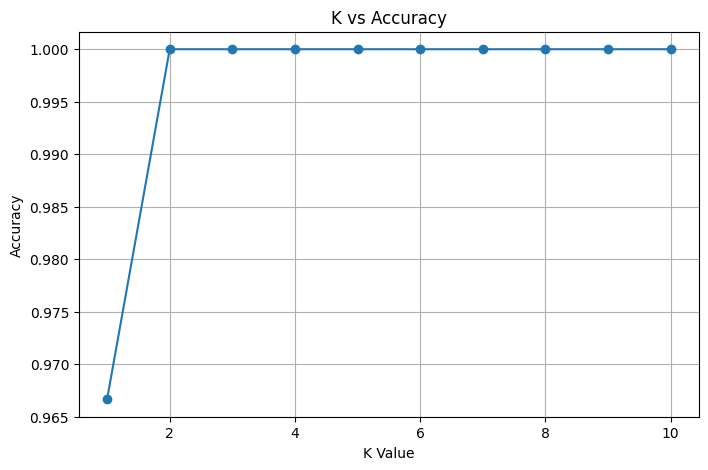

In [24]:
# Train KNN with differnt K 

k_values = range(1,11)
accuracies = []

for k in k_values:
    knn= KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# plot accuracy vs K

plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.title('K vs Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Best K:2
Accuracy: 1.0


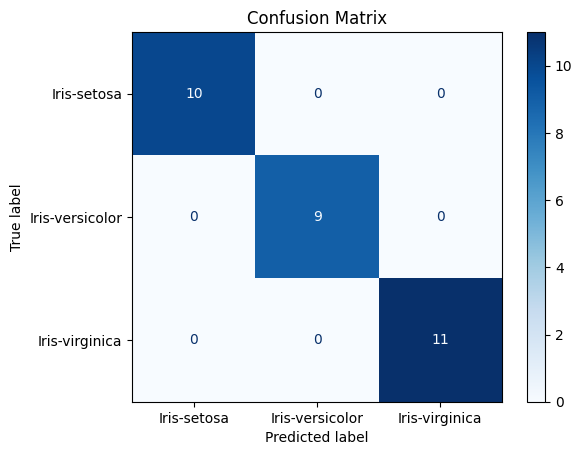

In [30]:
# step 6 Evaluate best model

best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best K:{best_k}")
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [31]:
# Step 7: Visualize Decision Boundaries (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42)

knn_pca = KNeighborsClassifier(n_neighbors=best_k)
knn_pca.fit(X_train_pca, y_train_pca)

,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


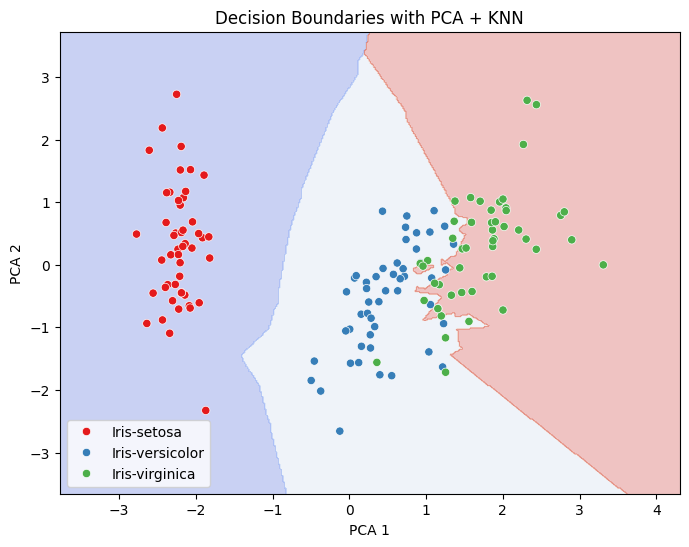

In [32]:
# Meshgrid for decision boundaries
h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=le.inverse_transform(y), palette='Set1')
plt.title("Decision Boundaries with PCA + KNN")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

## ✅ Conclusion


Implemented K-Nearest Neighbors (KNN) algorithm using the Iris dataset.

Normalized features using StandardScaler for better performance.

Split the data into training and testing sets (80/20 ratio).

Trained and tested KNN model with different values of K (1 to 10).

Identified the best K value based on highest accuracy.

Evaluated the model using accuracy score and confusion matrix.

Visualized decision boundaries after reducing dimensions with PCA.

Gained a clear understanding of KNN's working and its sensitivity to the choice of K and feature scaling.